In [1]:
import sys
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# To get functions to plot the band structure and hamiltonian
sys.path.append("../../../")
from periodiclas.tools.util import LASdata

In [3]:
# BNL Reference values
BNLIP = -5.87
BNLEA =  -2.60

In [4]:
dpi = 200

plt.rcParams.update({
    'xtick.labelsize': 24,
    'ytick.labelsize': 24,
    'axes.labelsize': 28,
    'figure.dpi': dpi,
    'axes.grid': True,
    'grid.linestyle': '--',
    'figure.figsize':(16,10),
    'axes.titlesize':24
})

# SI-Fig 13

4.269467863340062
0.11084214048684969
Band Gap: 4.158625722853213


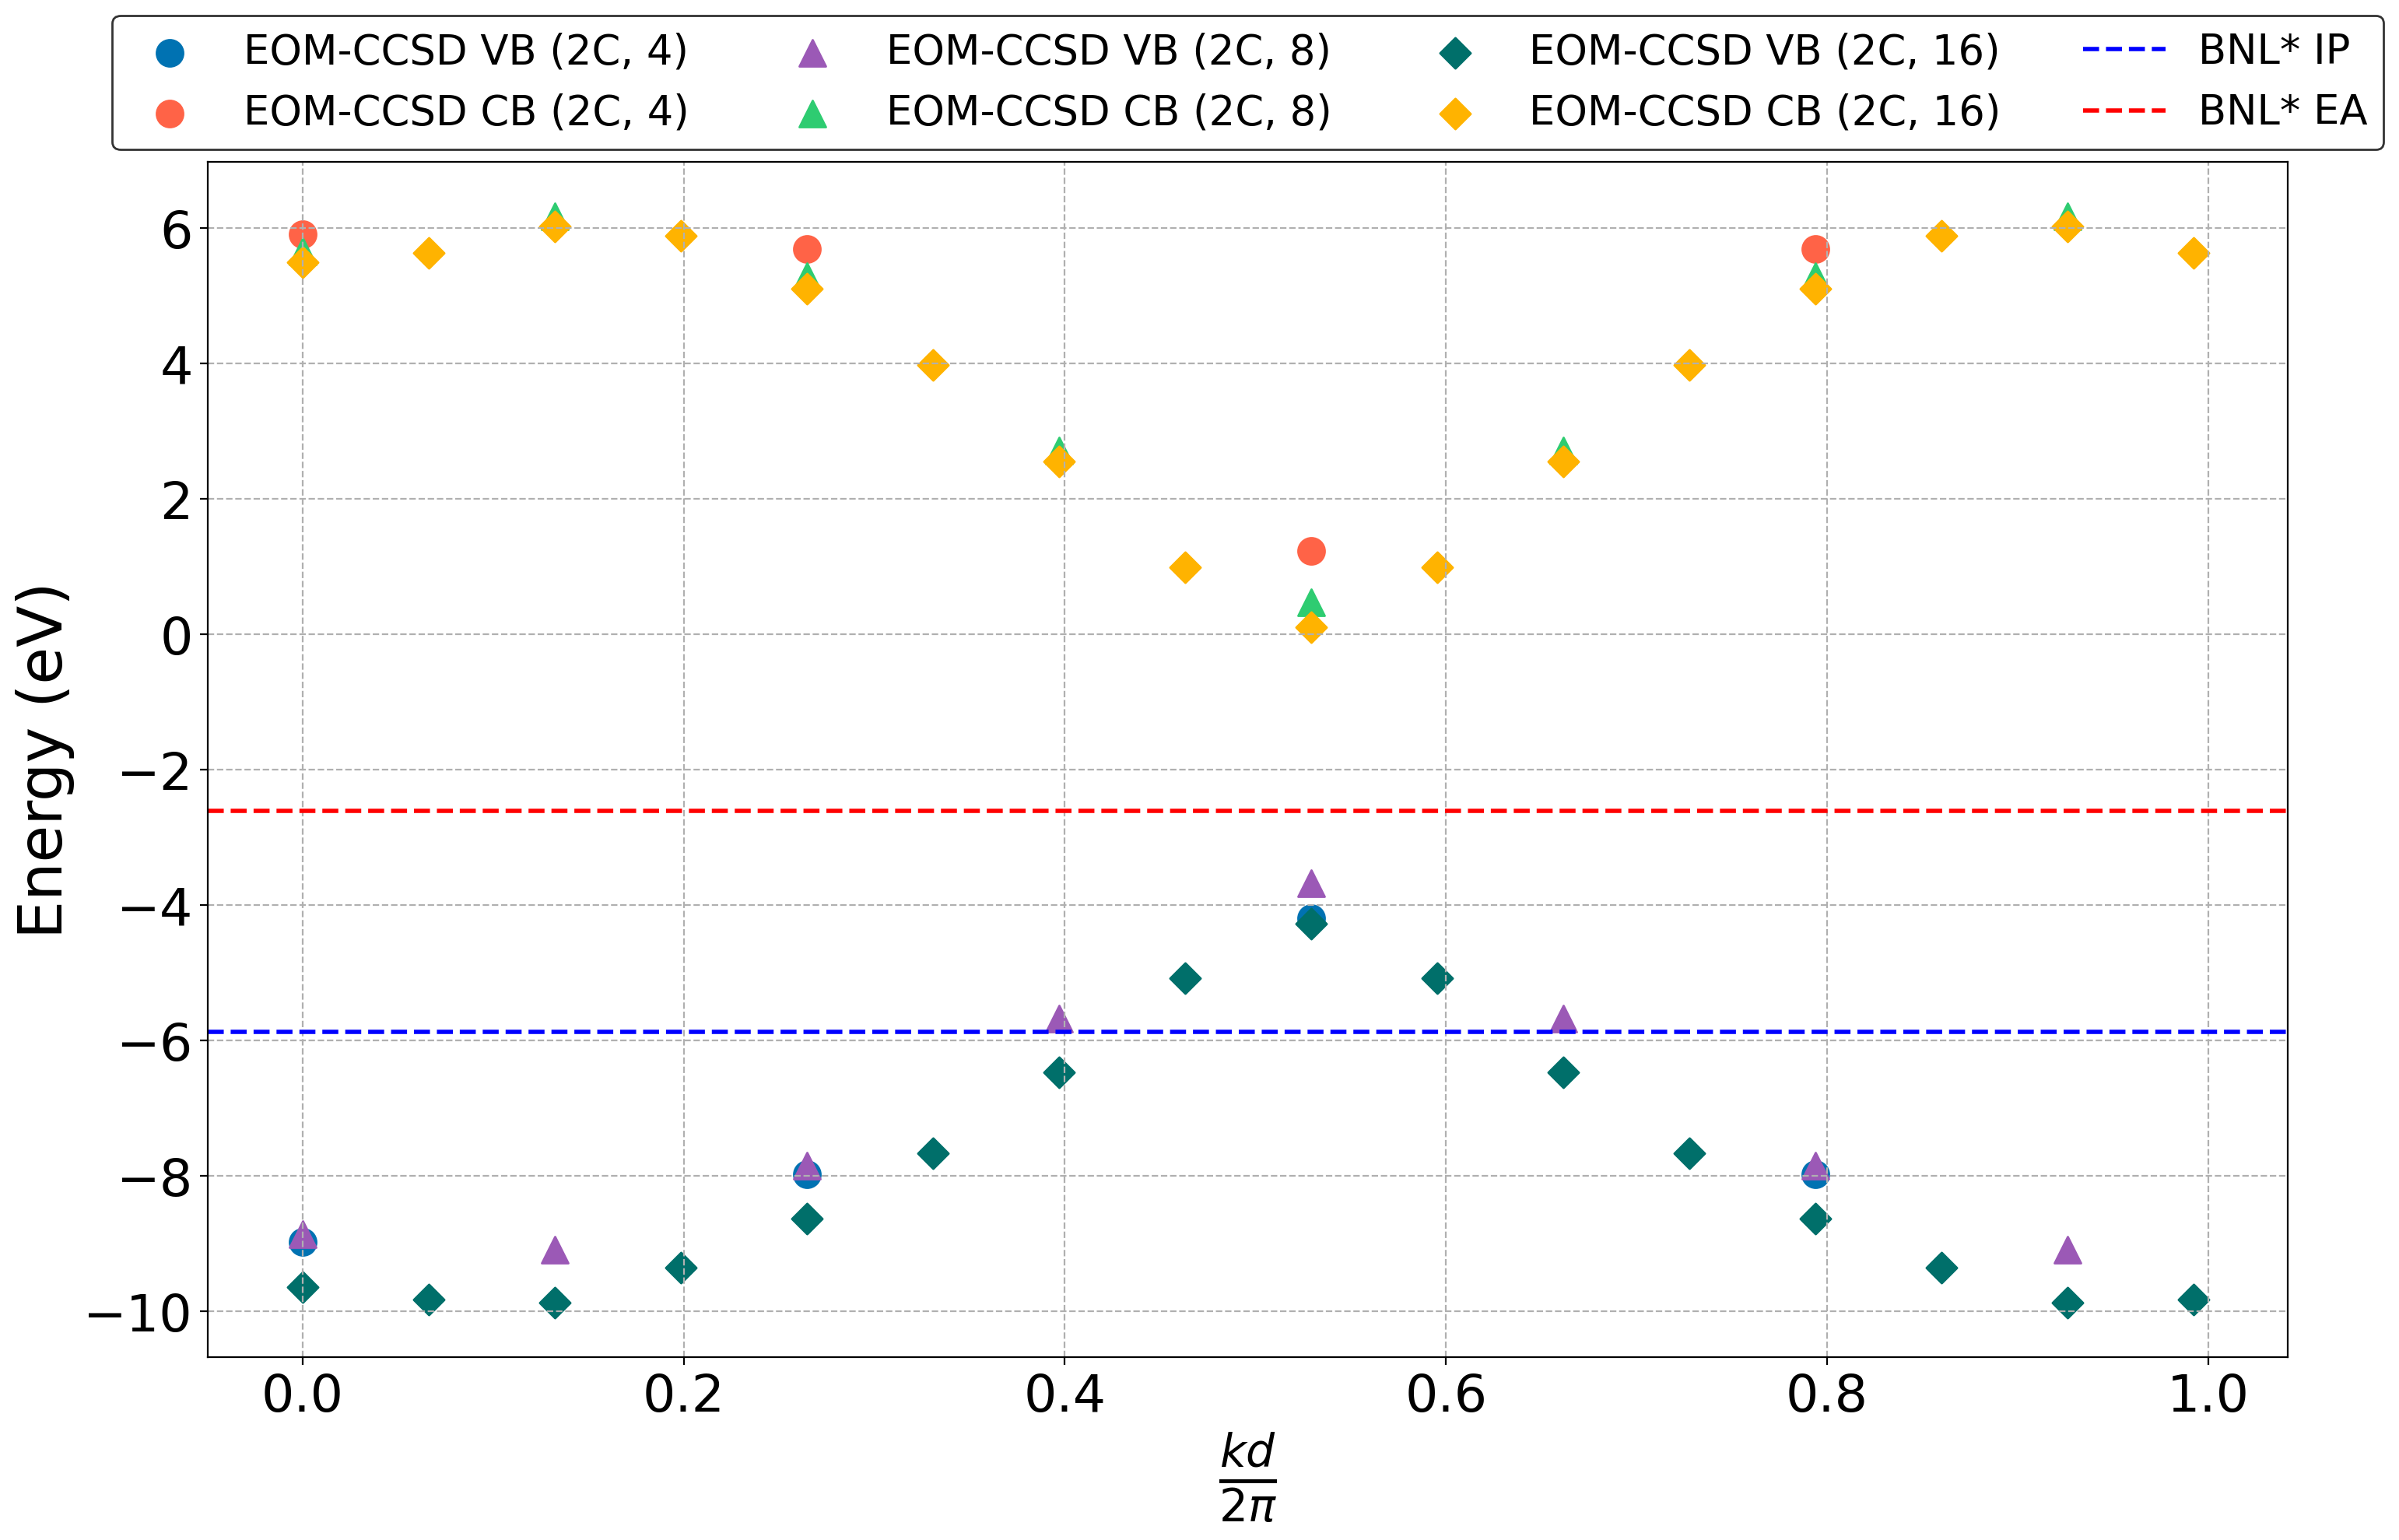

In [6]:
# Note the EOM-CCSD data is being stored in the atomic units.

plt.figure()

pklfile =  f'./PAChain.2.4.pkl'
with open(pklfile, "rb") as f:
        data = pickle.load(f)
homo = data['eip']
lumo = data['ea']
kpts = data['k']
kpts = kpts[:, 0] * 2.47/(np.pi)
plt.scatter(kpts, -27.21139*homo, label="EOM-CCSD VB (2C, 4)", color='#0072B2', marker='o',  s=150)
plt.scatter(kpts, 27.21139*lumo,  label="EOM-CCSD CB (2C, 4)", color='#FF6347', marker='o',  s=150)

pklfile =  f'./PAChain.2.8.pkl'
with open(pklfile, "rb") as f:
        data = pickle.load(f)
homo = data['eip']
lumo = data['ea']
kpts = data['k']
kpts = kpts[:, 0] * 2.47/(np.pi)
plt.scatter(kpts, -27.21139*homo, label="EOM-CCSD VB (2C, 8)", color='#9B59B6', marker='^',  s=150) 
plt.scatter(kpts, 27.21139*lumo,  label="EOM-CCSD CB (2C, 8)", color='#2ECC71', marker='^',  s=150)

pklfile =  f'./PAChain.2.16.pkl'
with open(pklfile, "rb") as f:
        data = pickle.load(f)

homo = data['eip']
lumo = data['ea']
print(-27.21139*np.max(-homo))
print(27.21139*np.min(lumo))
print("Band Gap:", -27.21139*np.max(-homo) - 27.21139*np.min(lumo) )
kpts = data['k']
kpts = kpts[:, 0] * 2.47/(np.pi)
plt.scatter(kpts, -27.21139*homo, label="EOM-CCSD VB (2C, 16)", color='#006F6A', marker='D',  s=100)
plt.scatter(kpts, 27.21139*lumo,  label="EOM-CCSD CB (2C, 16)", color='#FFB300', marker='D',  s=100)

plt.axhline(y=BNLIP, color='blue', linestyle='--', linewidth=2, label='BNL* IP')
plt.axhline(y=BNLEA, color='red', linestyle='--', linewidth=2, label='BNL* EA')
plt.xlabel(r"$\frac{kd}{2\pi}$", fontsize=30)
plt.ylabel("Energy (eV)")
plt.xticks()
plt.yticks()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.14), ncol=4,frameon=True, edgecolor='black', fontsize=19)
# plt.annotate("D",(0.0, -8),c='black',size=28)
plt.tight_layout()
plt.savefig('PAChainEOMCCSD.png', dpi=dpi)
# plt.close()